In [5]:
#import all the libraries and understand the data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
pd.set_option('display.max_columns',None)

In [6]:
train = pd.read_csv('train.csv')

In [9]:
train.shape

(1460, 81)

In [20]:
# Now we will find out all those columns who has any missing value
features_with_na = [feature for feature in train.columns if train[feature].isnull().sum() > 0]
#then we will find out the perecentage of missing data
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(),3),'% missing values')


LotFrontage 0.177 % missing values
Alley 0.938 % missing values
MasVnrType 0.005 % missing values
MasVnrArea 0.005 % missing values
BsmtQual 0.025 % missing values
BsmtCond 0.025 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.025 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.001 % missing values
FireplaceQu 0.473 % missing values
GarageType 0.055 % missing values
GarageYrBlt 0.055 % missing values
GarageFinish 0.055 % missing values
GarageQual 0.055 % missing values
GarageCond 0.055 % missing values
PoolQC 0.995 % missing values
Fence 0.808 % missing values
MiscFeature 0.963 % missing values


#### Lets find out the relationship between the missing value and target column sales price value

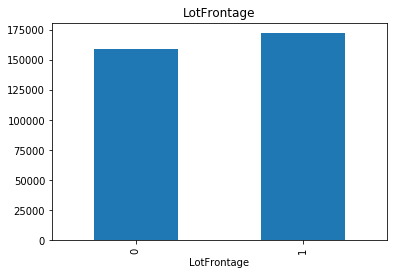

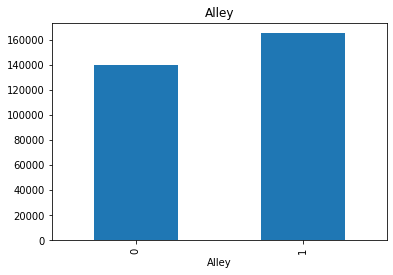

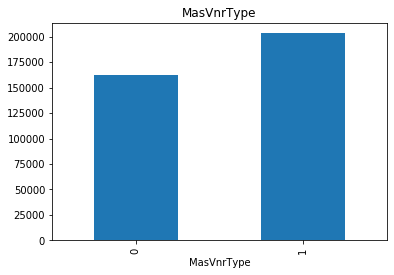

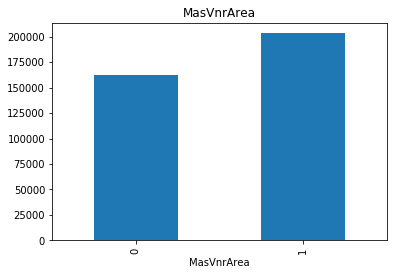

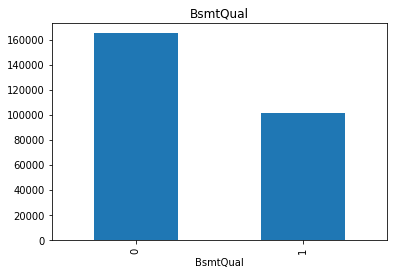

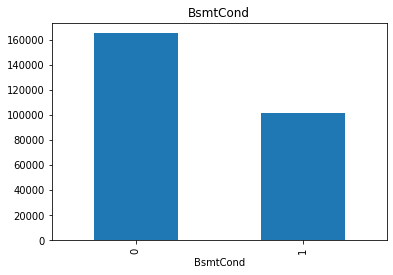

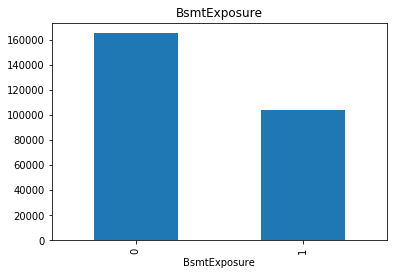

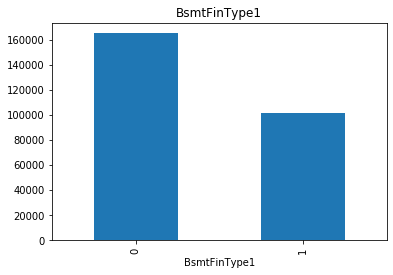

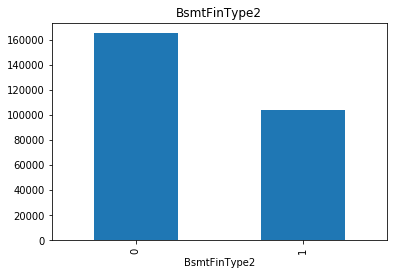

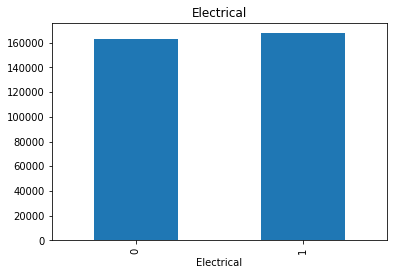

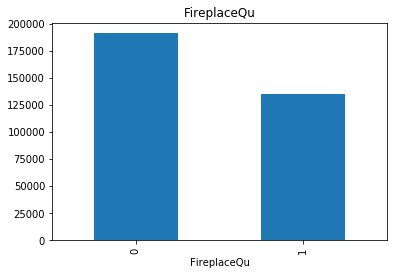

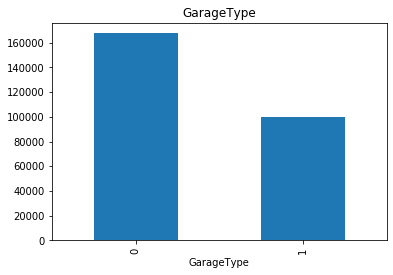

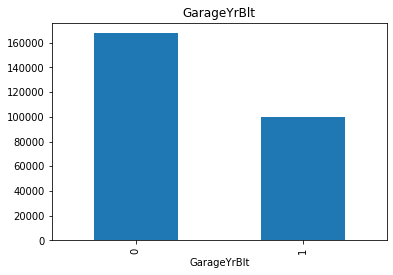

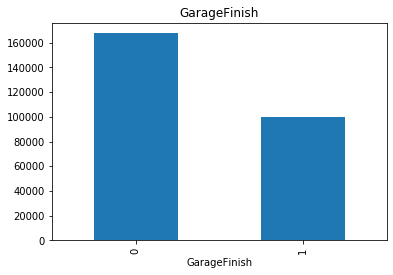

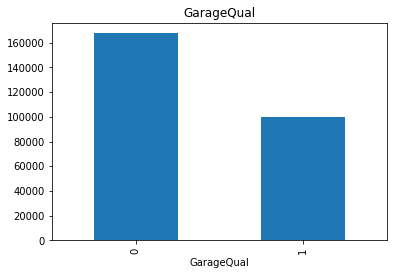

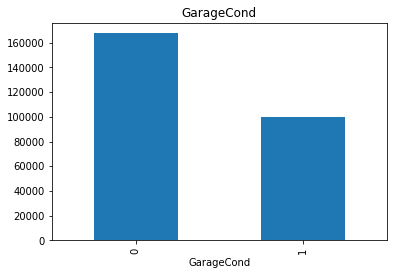

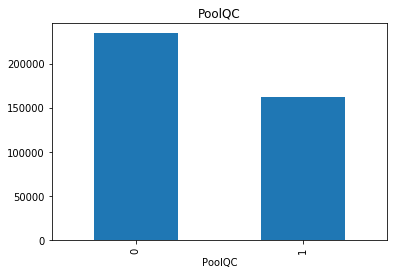

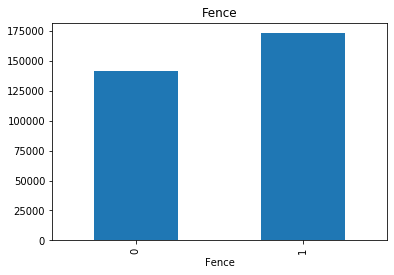

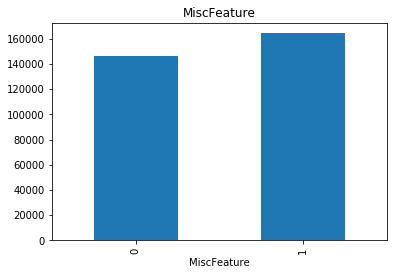

In [38]:
for feature in features_with_na:
    dataset = train.copy()
# lets replace dataset'column with null value with 1 or zero otherwise    
    dataset[feature] = np.where(train[feature].isnull(),1,0)
# Plot the bar diagram w.r.t to feature and median of sales price 
    data=dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    

###### As we can see in above diagram most of the columns with null value have hign Sales price median value, therefore we need to replace these value in further steps

## Numerical column

In [42]:
# Columns with numerical value
numerical_feature = [feature for feature in train.columns if train[feature].dtype != 'O']

print('The number of numerical feature in dataset : ', len(numerical_feature))
train[numerical_feature].head()

The number of numerical feature in dataset :  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Datetime column

In [43]:
year_feature = [feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
year_feature


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [44]:
# lets see the data of the year columns
for feature in year_feature:
    print(feature, train[feature].unique())   

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

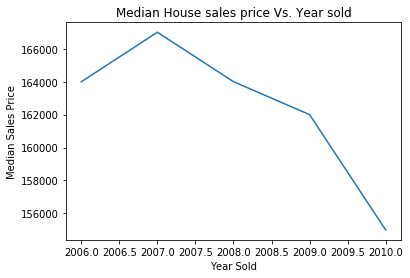

In [46]:
# Lets see the relationship between year the house is sold and its sales price
train.groupby('YrSold')['SalePrice'].median().plot()
plt.title('Median House sales price Vs. Year sold')
plt.ylabel('Median Sales Price')
plt.xlabel('Year Sold')
plt.show()

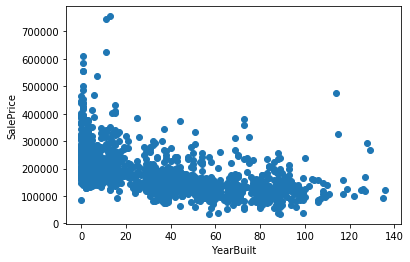

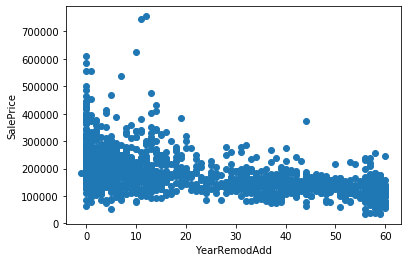

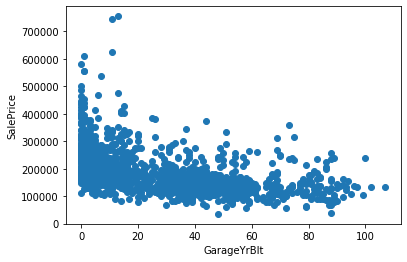

In [49]:
# Let see the difference in the year sold and other year's column w.r.t to Sales price
for feature in year_feature:
    if (feature != 'YrSold'):
        data = train.copy()
        data[feature] = train['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [53]:
# Numerical columns are of 2 types as Continous and Discrete column
discrete_feature = [feature for feature in numerical_feature if (len(train[feature].unique()) < 25) and feature not in
year_feature + ['Id']]
print('The number of Discrete column',len(discrete_feature))
train[discrete_feature].head()

The number of Discrete column 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


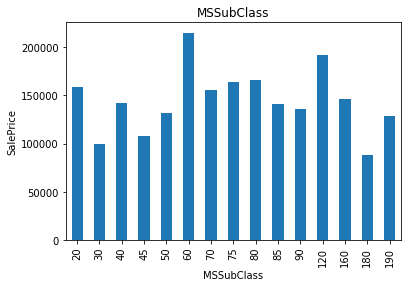

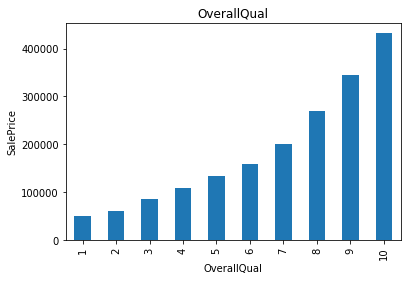

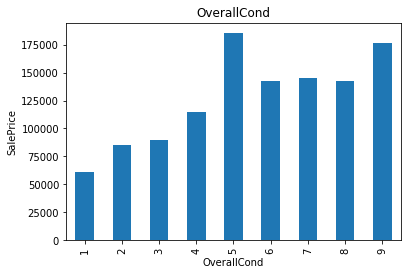

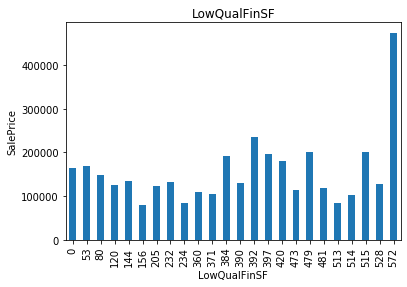

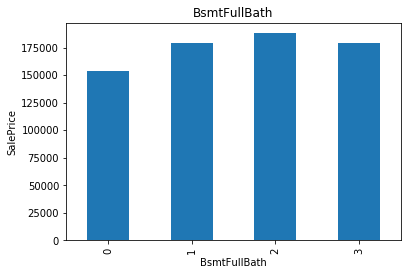

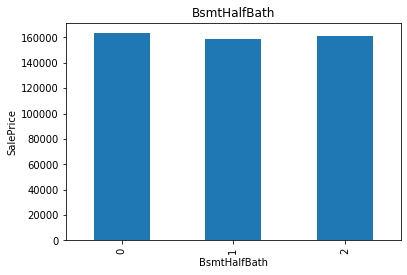

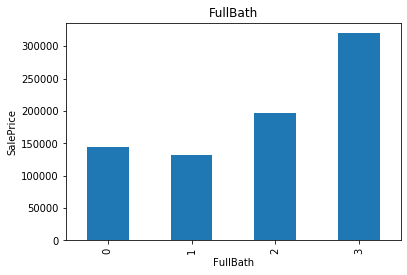

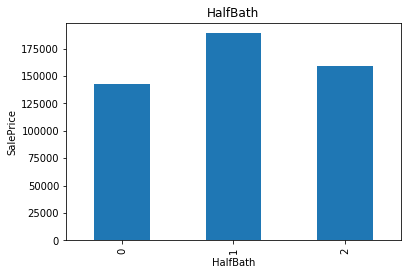

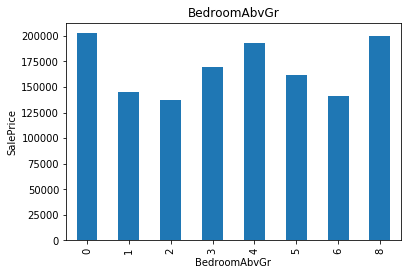

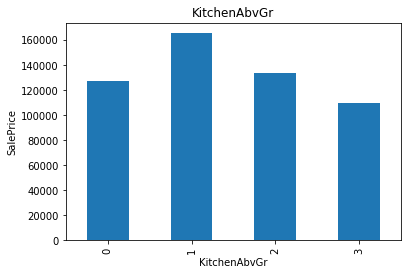

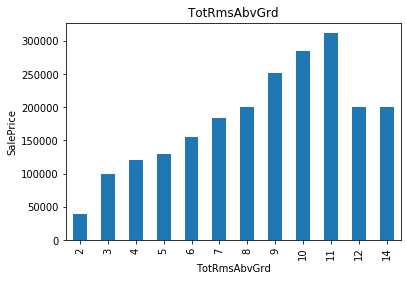

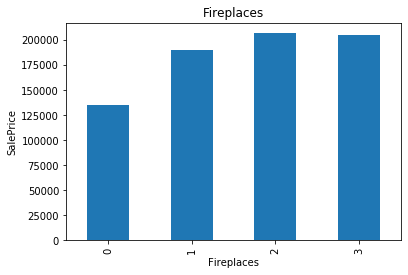

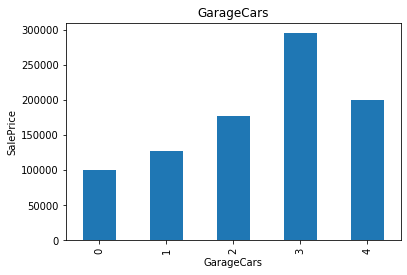

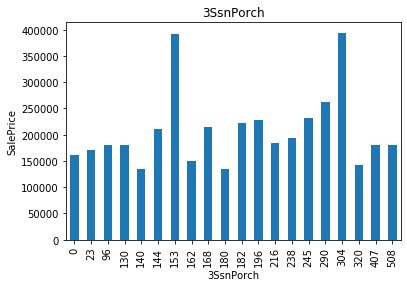

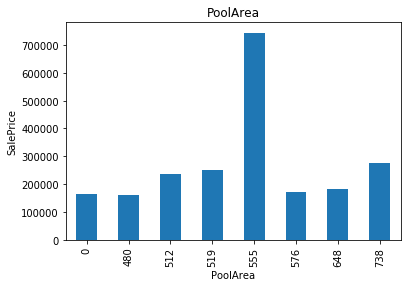

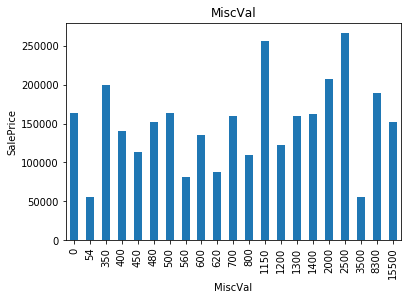

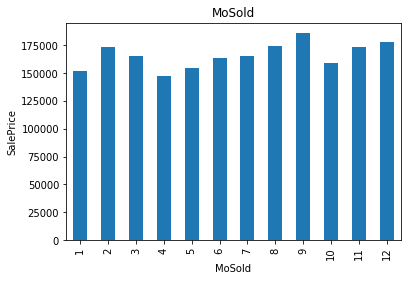

In [55]:
# Lets find the realtionship between Discrete columns and Sale price
for feature in discrete_feature:
    train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Continuous column

In [59]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature and feature not in
year_feature + ['Id']]
print('The number of Continuous column',len(continuous_feature))
train[continuous_feature].head()

The number of Continuous column 16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


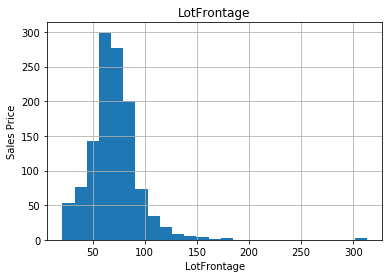

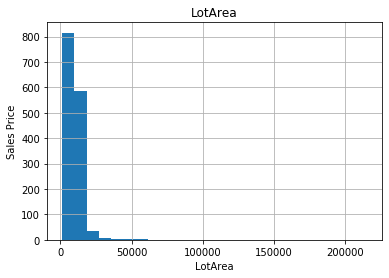

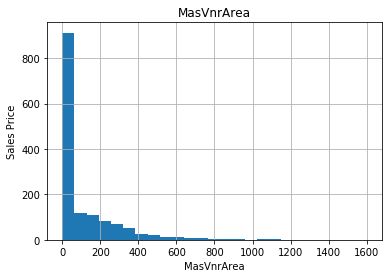

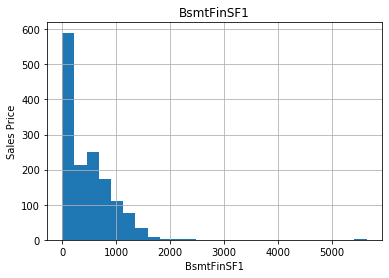

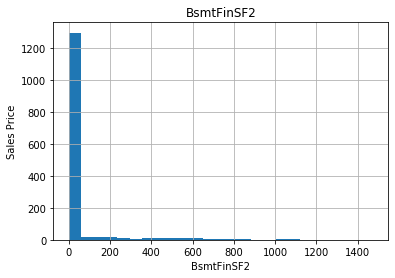

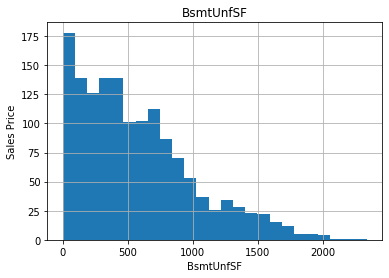

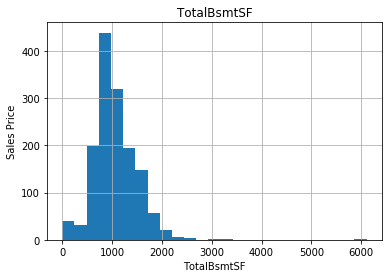

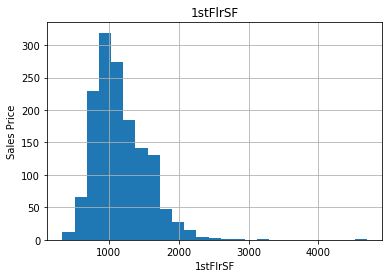

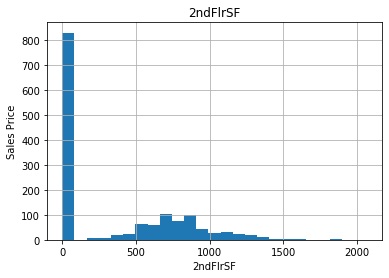

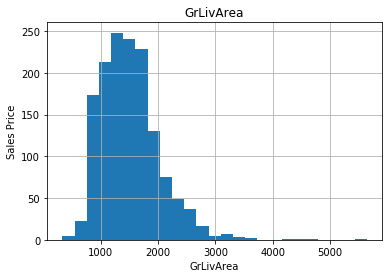

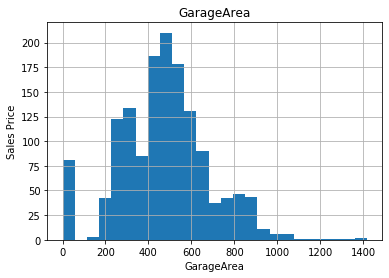

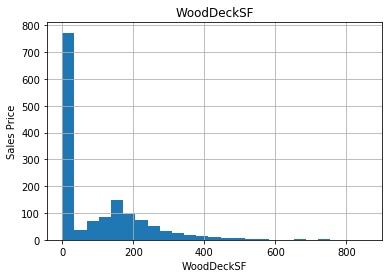

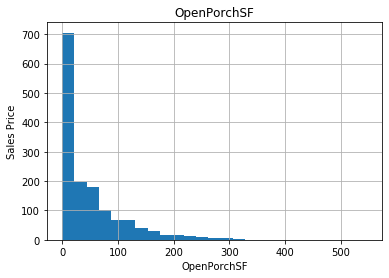

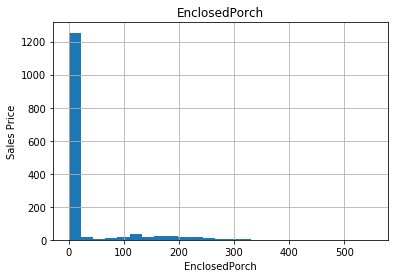

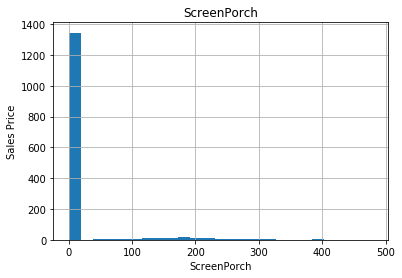

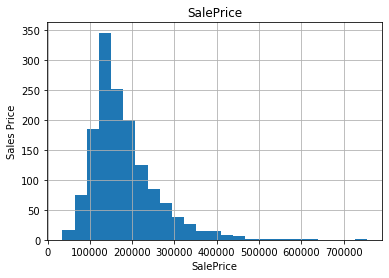

In [65]:
for feature in continuous_feature:
    data = train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

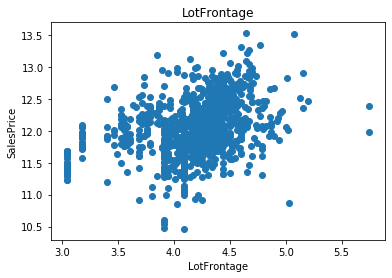

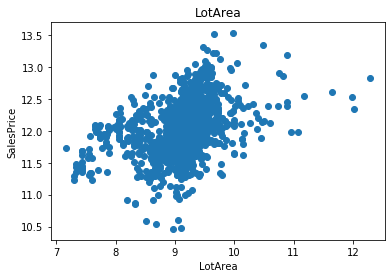

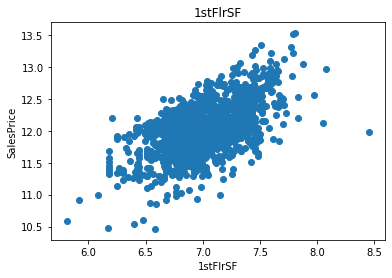

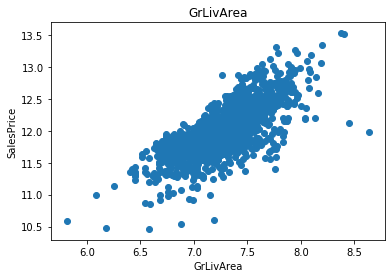

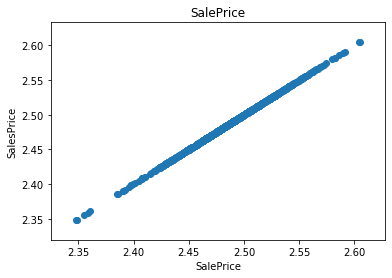

In [66]:
# Lets analyse continuous column We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

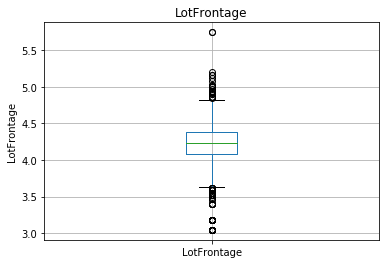

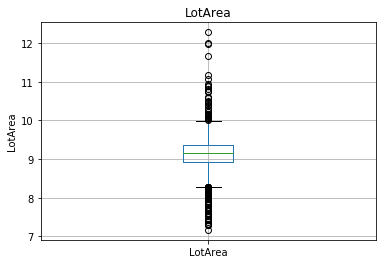

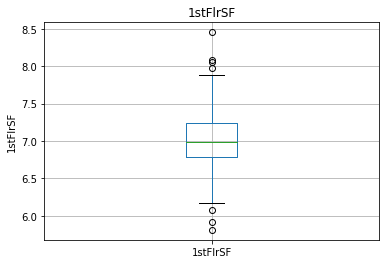

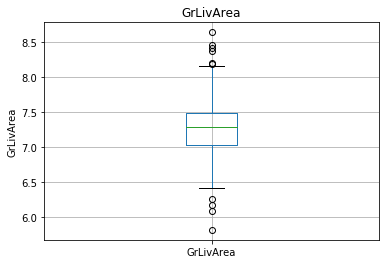

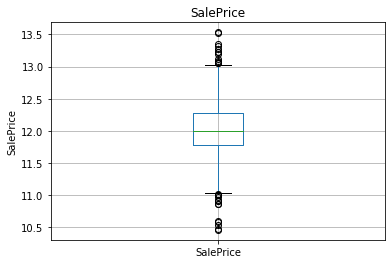

In [67]:
# Lets find out the outliers

for feature in continuous_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

## Categorical column

In [69]:
categorical_feature = [feature for feature in train.columns if train[feature].dtype == 'O' ]
print('The number of Categorical column : ', len(categorical_feature))
categorical_feature

The number of Categorical column :  43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']